https://stepik.org/lesson/1576182/step/9

In [ ]:
import torch
import torch.utils.data as data
import torch.nn as nn
import torch.optim as optim


class FuncModel(nn.Module):
    def __init__(self):
        super().__init__()
        # модель однослойной полносвязной нейронной сети:
        # 1-й слой: число входов 4 (x, x^2, x^3, x^4), число нейронов 1
        self.layer1 = nn.Linear(4, 1)

    def forward(self, x):
        xx = torch.stack([x, x ** 2, x ** 3, x ** 4], dim=1)
        x = self.layer1(xx)
        return x


torch.manual_seed(1)

model = FuncModel()

epochs = 15 # число эпох обучения
batch_size = 32 # размер батча

# Создание обучающей выборки (значения функции)
data_x = torch.arange(-3, 3, 0.01) #тензоры data_x, data_y не менять
data_y = 0.2 * data_x ** 3 + 0.5 * torch.sin(5 * data_x) - 0.1 * data_x ** 2

 # Создание dataset и разбивка на train и val
ds = data.TensorDataset(data_x, data_y)
d_train, d_val = data.random_split(ds, [0.8, 0.2])# разделить ds на две части в пропорции: 80% на 20%
train_data = data.DataLoader(d_train, batch_size=batch_size, shuffle=True) # создать объект класса DataLoader для d_train с размером пакетов batch_size и перемешиванием образов выборки
train_data_val = data.DataLoader(d_val, batch_size=batch_size, shuffle=False) # создать объект класса DataLoader для d_val с размером пакетов batch_size и без перемешивания образов выборки

# Оптимизатор и функция потерь
optimizer = optim.Adam(params=model.parameters(), lr=0.01) # создать оптимизатор Adam для обучения модели с шагом обучения 0.01
loss_func = nn.MSELoss() # создать функцию потерь с помощью класса MSELoss

# Сохраняем потери для графика
loss_lst_val = []   # список значений потерь при валидации
loss_lst = []       # список значений потерь при обучении

# Обучение сети
for _e in range(epochs):
    # вспомогательные переменные для вычисления среднего значения потерь при обучении
    loss_mean = 0
    lm_count = 0

    # обучение нейронной сети с вычисление средних потерь loss_mean
    for _x, _y in train_data:
        pred = model(_x).squeeze()  # прогноз по батчу
        loss = loss_func(pred, _y)  # потери по батчу
        optimizer.zero_grad()       # очистка градиента
        loss.backward()             # обратное распространение ошибки от выхода к входам с вычислением и накоплением градиентов в атрибуте .grad
        optimizer.step()            # обновление параметров сети на основе вычисленных градиентов
        loss_mean += loss.item()    # накопление потерь по батчам к общей сумме потерь
        lm_count += 1               # подсчёт общего числа батчей в эпохе

    loss_mean /= lm_count           # получаем среднюю потерю за эпоху

    # валидация нейронной сети с вычислением средних потерь Q_val
    Q_val = 0
    lm_count = 0
    for _x, _y in train_data_val:
        with torch.no_grad():
            pred = model(_x).squeeze()
            loss = loss_func(pred, _y)
            Q_val += loss.item()
            lm_count += 1
    Q_val /= lm_count

    # добавление в списки вычисленных значений потерь
    loss_lst.append(loss_mean)
    loss_lst_val.append(Q_val)

model.eval()                          # модель в режим эксплуатации
predict = model(data_x).squeeze()     # прогноз модели по всем данным выборки (ds.data)
Q = loss_func(predict, data_y).item() # потери по вссем данным

# print(Q)
# print(loss_lst)
# print(loss_lst_val)


0.22382023930549622
[24.1435853322347, 2.8544777472813925, 1.2976054747899373, 0.8680458903312683, 0.7290794213612874, 0.6372626086076101, 0.5615566611289978, 0.4927633047103882, 0.4338616053263346, 0.38873202800750734, 0.34607020219167073, 0.3083385984102885, 0.28027170499165854, 0.2521014998356501, 0.23394807775815327]
[3.715756058692932, 1.2465892732143402, 1.0948912501335144, 0.775442585349083, 0.6682257801294327, 0.5853415280580521, 0.5260818898677826, 0.46291065961122513, 0.40656252205371857, 0.35889848321676254, 0.32812920957803726, 0.2909527122974396, 0.26879745721817017, 0.24305538088083267, 0.22467464581131935]


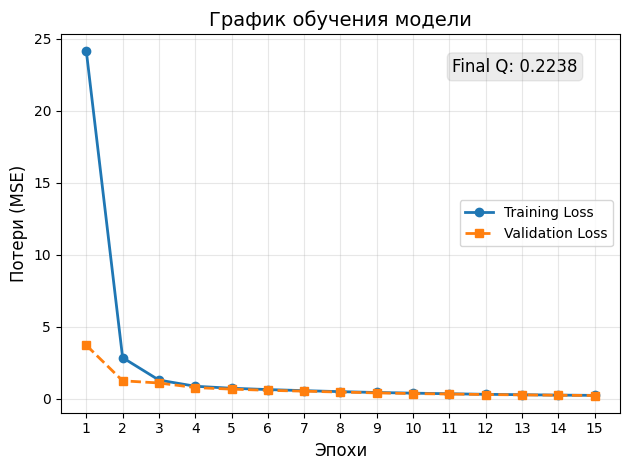

In [ ]:
# График
import matplotlib.pyplot as plt

plt.plot(loss_lst, label='Training Loss', marker='o', linestyle='-', linewidth=2)
plt.plot(loss_lst_val, label='Validation Loss', marker='s', linestyle='--', linewidth=2)
plt.title('График обучения модели', fontsize=14)
plt.xlabel('Эпохи', fontsize=12)
plt.ylabel('Потери (MSE)', fontsize=12)
plt.xticks(range(epochs), range(1, epochs+1))  # Нумерация эпох с 1
plt.grid(True, alpha=0.3)
plt.legend()

# Аннотация с итоговой ошибкой
plt.annotate(f'Final Q: {Q:.4f}',
             xy=(0.7, 0.9),
             xycoords='axes fraction',
             fontsize=12,
             bbox=dict(boxstyle="round", alpha=0.15, color='gray'))

plt.tight_layout()
plt.show()

In [ ]:
import torch
import torch.utils.data as data
import torch.nn as nn
import torch.optim as optim


class FuncModel(nn.Module):
    def __init__(self):
        super().__init__()
        # модель однослойной полносвязной нейронной сети:
        # 1-й слой: число входов 4 (x, x^2, x^3, x^4), число нейронов 1
        self.lin1 = nn.Linear(4, 1)


    def forward(self, x):
        x = x.unsqueeze(-1)
        xx = torch.cat([x, x ** 2, x ** 3, x ** 4], dim=1)
        res = self.lin1(xx)

        return res


torch.manual_seed(1)

model = FuncModel() # создать модель FuncModel

epochs = 15 # число эпох обучения
batch_size = 32 # размер батча

# создание обучающей выборки (значения функции)
data_x = torch.arange(-3, 3, 0.01) #тензоры data_x, data_y не менять
data_y = 0.2 * data_x ** 3 + 0.5 * torch.sin(5 * data_x) - 0.1 * data_x ** 2

ds = data.TensorDataset(data_x, data_y) # создание dataset
d_train, d_val = data.random_split(ds, (.8, .2)) # разделить ds на две части в пропорции: 80% на 20%

train_data = data.DataLoader(d_train, batch_size, True) # создать объект класса DataLoader для d_train с размером пакетов batch_size и перемешиванием образов выборки
train_data_val = data.DataLoader(d_val, batch_size) # создать объект класса DataLoader для d_val с размером пакетов batch_size и без перемешивания образов выборки

optimizer = optim.Adam(params=model.parameters(), lr=0.01)# создать оптимизатор Adam для обучения модели с шагом обучения 0.01
loss_func = nn.MSELoss()# создать функцию потерь с помощью класса MSELoss

loss_lst_val = []  # список значений потерь при валидации
loss_lst = []  # список значений потерь при обучении

for _e in range(epochs):
    loss_mean = 0 # вспомогательные переменные для вычисления среднего значения потерь при обучении
    lm_count = 0

    # обучение нейронной сети с вычисление средних потерь loss_mean
    for X_train, y_train in train_data:
        preds = model(X_train)
        loss = loss_func(preds.flatten(), y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # вычисление среднего значения функции потерь по всей выборке
        lm_count += 1
        loss_mean = 1/lm_count * loss.item() + (1 - 1/lm_count) * loss_mean


    # валидация нейронной сети с вычислением средних потерь Q_val
    model.eval()

    Q_val = 0
    count_val = 0

    for X_val, y_val in train_data_val:
        with torch.no_grad():
            preds = model(X_val)
            loss = loss_func(preds.flatten(), y_val)
            Q_val += loss.item()
            count_val += 1

    # сохранить средние потери, вычисленные по выборке валидации, в переменной Q_val
    Q_val /= count_val

    # добавление в списки вычисленных значений потерь
    loss_lst.append(loss_mean)
    loss_lst_val.append(Q_val)

# перевести модель в режим эксплуатации
model.eval()

preds = model(data_x)

Q = loss_func(preds.flatten(), data_y) # вычислить потери с помощью loss_func по всем данным выборки ds; значение Q сохранить в виде вещественного числа

print(Q)
print(loss_lst)
print(loss_lst_val)

tensor(0.2238, grad_fn=<MseLossBackward0>)
[24.143585332234696, 2.854477747281393, 1.2976054747899373, 0.8680458903312683, 0.7290794213612874, 0.6372626086076101, 0.5615566611289978, 0.49276330471038804, 0.4338616053263348, 0.38873202800750734, 0.34607020219167084, 0.3083385984102886, 0.28027170499165843, 0.2521014998356501, 0.23394807775815335]
[3.715756058692932, 1.2465892732143402, 1.0948912501335144, 0.775442585349083, 0.6682257801294327, 0.5853415280580521, 0.5260818898677826, 0.46291065961122513, 0.40656252205371857, 0.35889848321676254, 0.32812920957803726, 0.2909527122974396, 0.26879745721817017, 0.24305538088083267, 0.22467464581131935]
